In [11]:
#setup spark and imports
#%config IPCompleter.greedy=True
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np

In [12]:
#get spark session, close it if it already exists, otherwise create a new one
try:
    if sc is None:
        print("sc is not defined")
except Exception:
        print("error found, recovering and creating spark connection")
else:
        print("old sc found, stopping it now")    
        sc.stop()
        print("stopped old sc")

conf = pyspark.SparkConf().setAppName('app').setMaster('local[2]')
sc = pyspark.SparkContext(conf=conf)
sc.setSystemProperty('spark.executor.memory','12g')
spark = SparkSession(sc)
"created spark session"

old sc found, stopping it now
stopped old sc


'created spark session'

In [13]:
#read in data from csv
data = spark.read.load("../src/test/resources/CelticsData.csv",
                     format="csv", sep=",", inferSchema="true", header="true")

In [14]:
#show data
true = True
false = False
data.show(vertical=true,n=1)
data.cache()
data.createOrReplaceTempView("stats")

-RECORD 0--------------
 TEAM      | BOS       
 MATCH UP  | BOS @ WAS 
 GAME DATE | 1/6/2020  
 W/L       | L         
 MIN       | 240       
 PTS       | 94        
 FGM       | 33        
 FGA       | 95        
 FG%       | 34.7      
 3PM       | 8         
 3PA       | 37        
 3P%       | 21.6      
 FTM       | 20        
 FTA       | 26        
 FT%       | 76.9      
 OREB      | 16        
 DREB      | 39        
 REB       | 55        
 AST       | 17        
 STL       | 7         
 BLK       | 8         
 TOV       | 17        
 PF        | 20        
 +/-       | -5        
only showing top 1 row



In [33]:
#setup spark to pandas conversion note new key setting
#spark.conf.set("spark.sql.execution.arrow.enabled", "true")
#spark.conf.set("pyarrow.ipc.open_stream","true")
#convert to pandas
p = data.toPandas()
p

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,BOS,BOS @ WAS,1/6/2020,L,240,94,33,95,34.7,8,...,76.9,16,39,55,17,7,8,17,20,-5
1,BOS,BOS @ CHI,1/4/2020,W,240,111,43,82,52.4,8,...,81.0,13,31,44,22,10,5,20,22,7
2,BOS,BOS vs. ATL,1/3/2020,W,240,109,41,93,44.1,6,...,72.4,12,42,54,23,9,7,13,16,3
3,BOS,BOS @ CHA,12/31/2019,W,240,109,44,97,45.4,14,...,70.0,15,39,54,25,12,9,13,16,17
4,BOS,BOS vs. TOR,12/28/2019,L,240,97,31,78,39.7,7,...,77.8,7,24,31,18,11,4,15,17,-16
5,BOS,BOS vs. CLE,12/27/2019,W,240,129,49,95,51.6,14,...,89.5,12,31,43,28,4,10,11,23,12
6,BOS,BOS @ TOR,12/25/2019,W,240,118,46,92,50.0,14,...,85.7,13,32,45,26,7,3,19,22,16
7,BOS,BOS vs. CHA,12/22/2019,W,240,119,46,88,52.3,14,...,81.3,10,47,57,25,2,9,13,24,26
8,BOS,BOS vs. DET,12/20/2019,W,240,114,45,86,52.3,9,...,71.4,13,38,51,24,13,9,20,19,21
9,BOS,BOS @ DAL,12/18/2019,W,240,109,35,86,40.7,12,...,90.0,14,40,54,13,3,4,16,21,6


In [34]:
#setup qgrid
#import qgrid
#q = qgrid.show_grid(p, show_toolbar=True)


In [35]:
#q

In [36]:
#get changed qgrid
#b = q.get_changed_df()

In [37]:
#b

In [38]:
#setup features and labels for the tree

In [39]:
labels = p['W/L']
labels

0     L
1     W
2     W
3     W
4     L
5     W
6     W
7     W
8     W
9     W
10    L
11    L
12    W
13    W
14    W
15    W
16    L
17    W
18    W
19    L
20    L
21    W
22    L
23    W
24    W
25    W
26    W
27    W
28    W
29    W
30    W
31    W
32    W
33    L
Name: W/L, dtype: object

In [40]:
#features = ["MIN","PTS","FGM","FGA","FG%","3PM","3PA","3P%","FTM","FTA","FT%","OREB","DREB","REB","AST","STL","BLK","TOV", "PF","+/-"]
features = ["PTS","FGM","FGA","FG%","3PM","3PA","3P%","FTM","FTA","FT%","OREB","DREB","REB","AST","STL","BLK","TOV", "PF"]

In [41]:
features

['PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF']

In [42]:
#get dataframe of just features
X = p.loc[:,features]
X

,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,94,33,95,34.7,8,37,21.6,20,26,76.9,16,39,55,17,7,8,17,20
1,111,43,82,52.4,8,19,42.1,17,21,81.0,13,31,44,22,10,5,20,22
2,109,41,93,44.1,6,25,24.0,21,29,72.4,12,42,54,23,9,7,13,16
3,109,44,97,45.4,14,38,36.8,7,10,70.0,15,39,54,25,12,9,13,16
4,97,31,78,39.7,7,32,21.9,28,36,77.8,7,24,31,18,11,4,15,17
5,129,49,95,51.6,14,40,35.0,17,19,89.5,12,31,43,28,4,10,11,23
6,118,46,92,50.0,14,33,42.4,12,14,85.7,13,32,45,26,7,3,19,22
7,119,46,88,52.3,14,32,43.8,13,16,81.3,10,47,57,25,2,9,13,24
8,114,45,86,52.3,9,27,33.3,15,21,71.4,13,38,51,24,13,9,20,19
9,109,35,86,40.7,12,38,31.6,27,30,90.0,14,40,54,13,3,4,16,21


In [43]:
#setup plot
import matplotlib.pyplot as plt
print(plt.rcParams.get('figure.figsize'))

[20.0, 20.0]


In [44]:
#setup figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

In [45]:
Y = p["W/L"]
Y

0     L
1     W
2     W
3     W
4     L
5     W
6     W
7     W
8     W
9     W
10    L
11    L
12    W
13    W
14    W
15    W
16    L
17    W
18    W
19    L
20    L
21    W
22    L
23    W
24    W
25    W
26    W
27    W
28    W
29    W
30    W
31    W
32    W
33    L
Name: W/L, dtype: object

In [46]:
from platform import python_version
print(python_version())
import sklearn

3.7.4


In [47]:
type(Y)

pandas.core.series.Series

In [48]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn import tree
from sklearn.model_selection import cross_val_score
#set how many folds/combinations you want
k=5
clf = tree.DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, Y, cv=k)
#clf = clf.fit(X, Y)
scores

The scikit-learn version is 0.22.


array([0.85714286, 0.57142857, 0.57142857, 0.71428571, 0.66666667])

In [49]:
#compute the mean accuracy, and the margin of error at 95% confidence interval. I.e., we are 95% confident that the mean
#accuracy is 68% +- 2 standard deviations (the more deviations the more confident we can be, widening the beam/net).
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), (scores.std() * 2)/k**(1/2)))
scores.mean()

Accuracy: 0.68 (+/- 0.09)


0.6761904761904761

In [50]:
#get sorted labels for plot 
import numpy as np
sorted = labels.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['L', 'W']

In [51]:
from pandas.plotting import scatter_matrix
#scatter_matrix(p, alpha=0.2,figsize=(20, 6))
#scatter_matrix(p, alpha=0.2,figsize=(200,500 ), diagonal='kde')


In [52]:
#pd.set_option('display.max_colwidth', 1)
p

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,BOS,BOS @ WAS,1/6/2020,L,240,94,33,95,34.7,8,...,76.9,16,39,55,17,7,8,17,20,-5
1,BOS,BOS @ CHI,1/4/2020,W,240,111,43,82,52.4,8,...,81.0,13,31,44,22,10,5,20,22,7
2,BOS,BOS vs. ATL,1/3/2020,W,240,109,41,93,44.1,6,...,72.4,12,42,54,23,9,7,13,16,3
3,BOS,BOS @ CHA,12/31/2019,W,240,109,44,97,45.4,14,...,70.0,15,39,54,25,12,9,13,16,17
4,BOS,BOS vs. TOR,12/28/2019,L,240,97,31,78,39.7,7,...,77.8,7,24,31,18,11,4,15,17,-16
5,BOS,BOS vs. CLE,12/27/2019,W,240,129,49,95,51.6,14,...,89.5,12,31,43,28,4,10,11,23,12
6,BOS,BOS @ TOR,12/25/2019,W,240,118,46,92,50.0,14,...,85.7,13,32,45,26,7,3,19,22,16
7,BOS,BOS vs. CHA,12/22/2019,W,240,119,46,88,52.3,14,...,81.3,10,47,57,25,2,9,13,24,26
8,BOS,BOS vs. DET,12/20/2019,W,240,114,45,86,52.3,9,...,71.4,13,38,51,24,13,9,20,19,21
9,BOS,BOS @ DAL,12/18/2019,W,240,109,35,86,40.7,12,...,90.0,14,40,54,13,3,4,16,21,6


TRAIN: [ 0  1  3  4  5  6  7  8  9 10 12 13 14 15 16 18 19 21 22 23 24 27 28 29
 30 32 33] TEST: [ 2 11 17 20 25 26 31]
model score =  0.7142857142857143
Average K-Fold Score : 0.6761904761904761
TRAIN: [ 0  1  2  3  4  5  6  7  9 11 12 13 14 17 18 19 20 21 22 23 25 26 27 28
 29 31 32] TEST: [ 8 10 15 16 24 30 33]
model score =  0.7142857142857143
Average K-Fold Score : 0.6761904761904761
TRAIN: [ 0  2  3  4  6  7  8  9 10 11 12 15 16 17 18 19 20 21 23 24 25 26 27 30
 31 32 33] TEST: [ 1  5 13 14 22 28 29]
model score =  1.0
Average K-Fold Score : 0.6761904761904761
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 13 14 15 16 17 20 22 24 25 26 27 28 29 30
 31 32 33] TEST: [ 4  6 12 18 19 21 23]
model score =  0.7142857142857143
Average K-Fold Score : 0.6761904761904761
TRAIN: [ 1  2  4  5  6  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 28
 29 30 31 33] TEST: [ 0  3  7  9 27 32]
model score =  0.8333333333333334
Average K-Fold Score : 0.6761904761904761


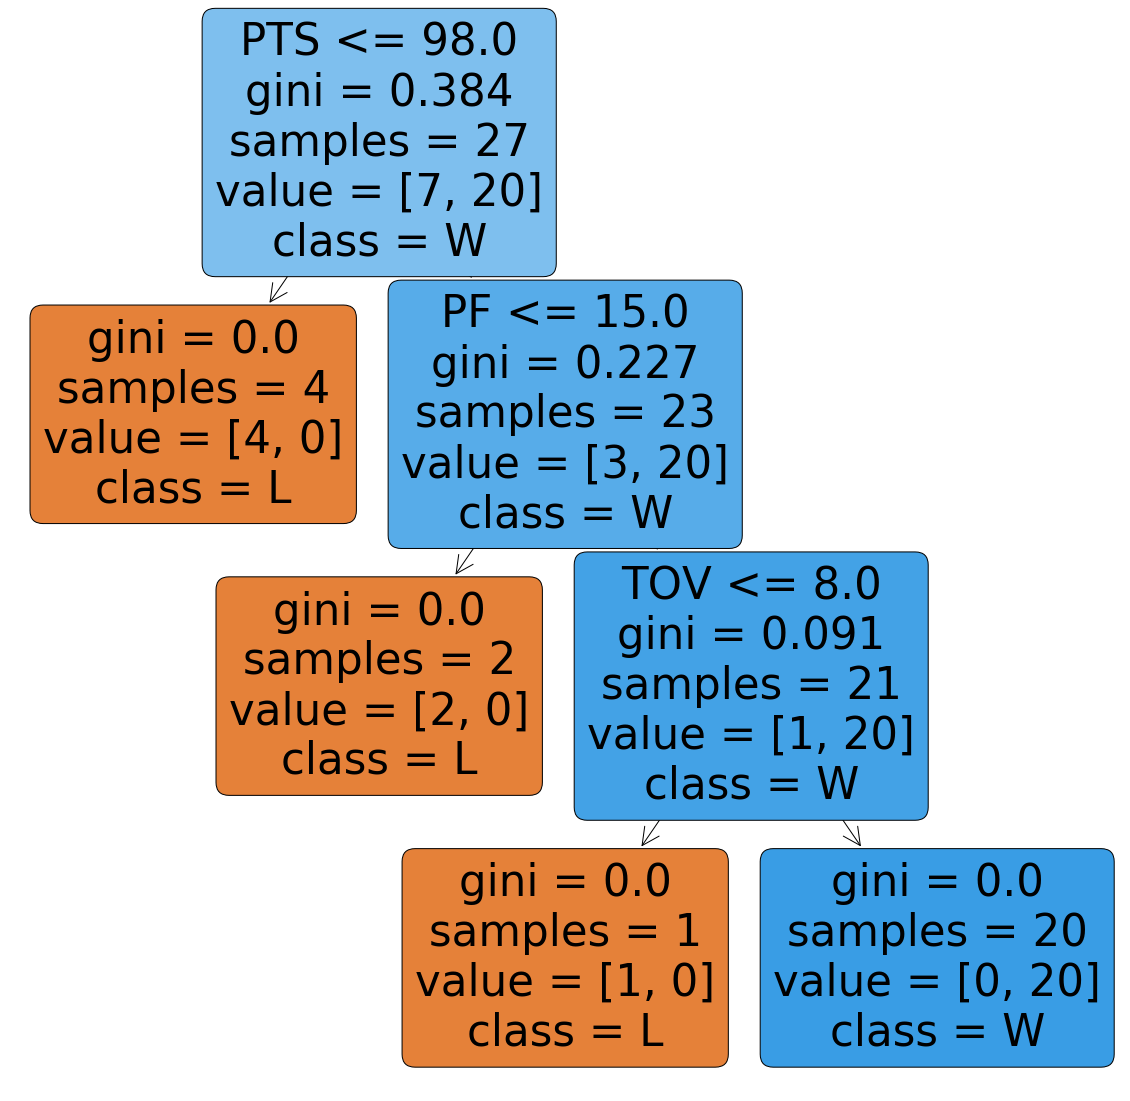

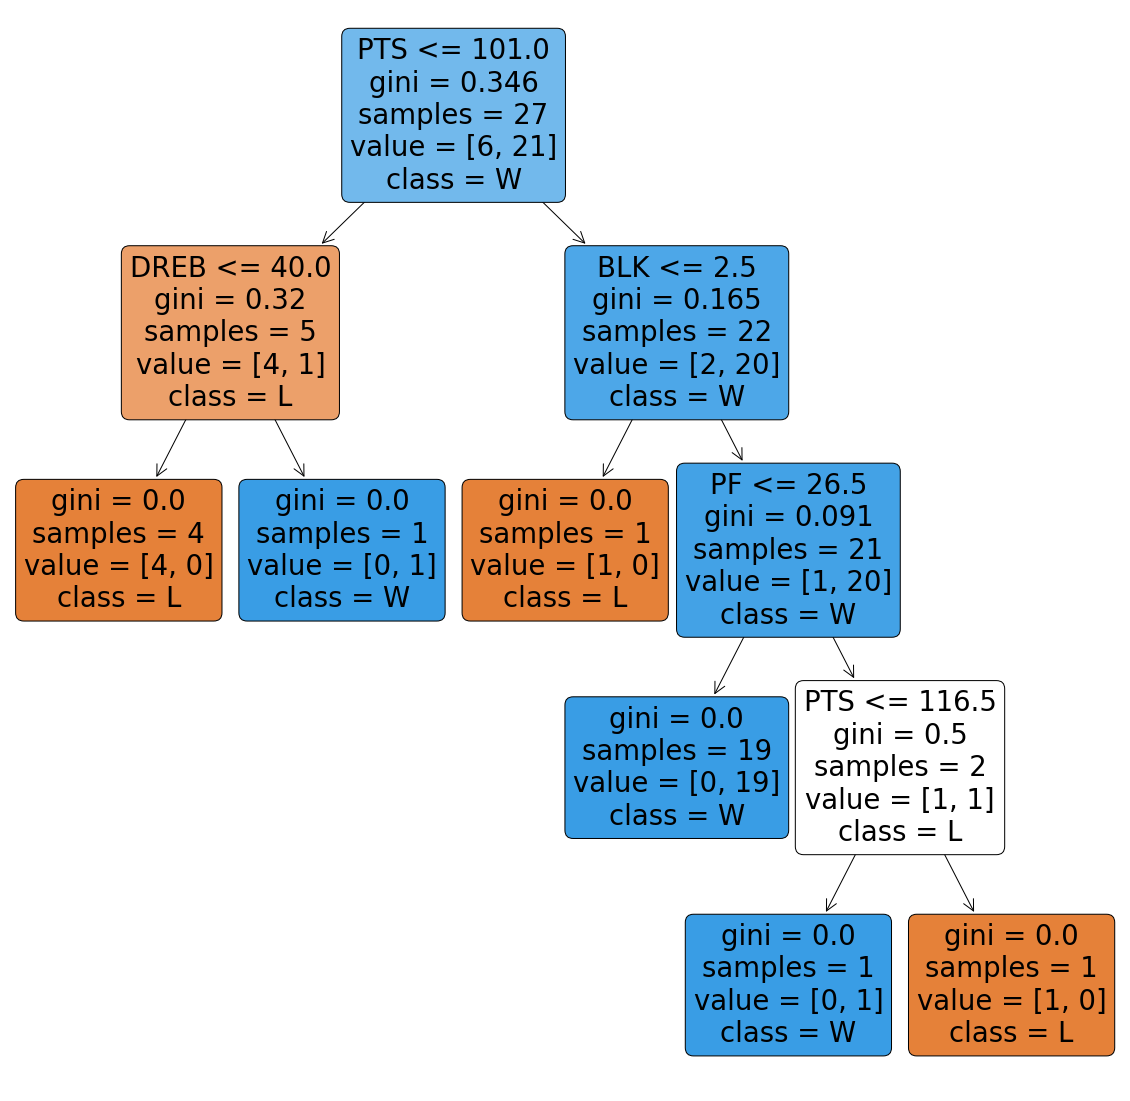

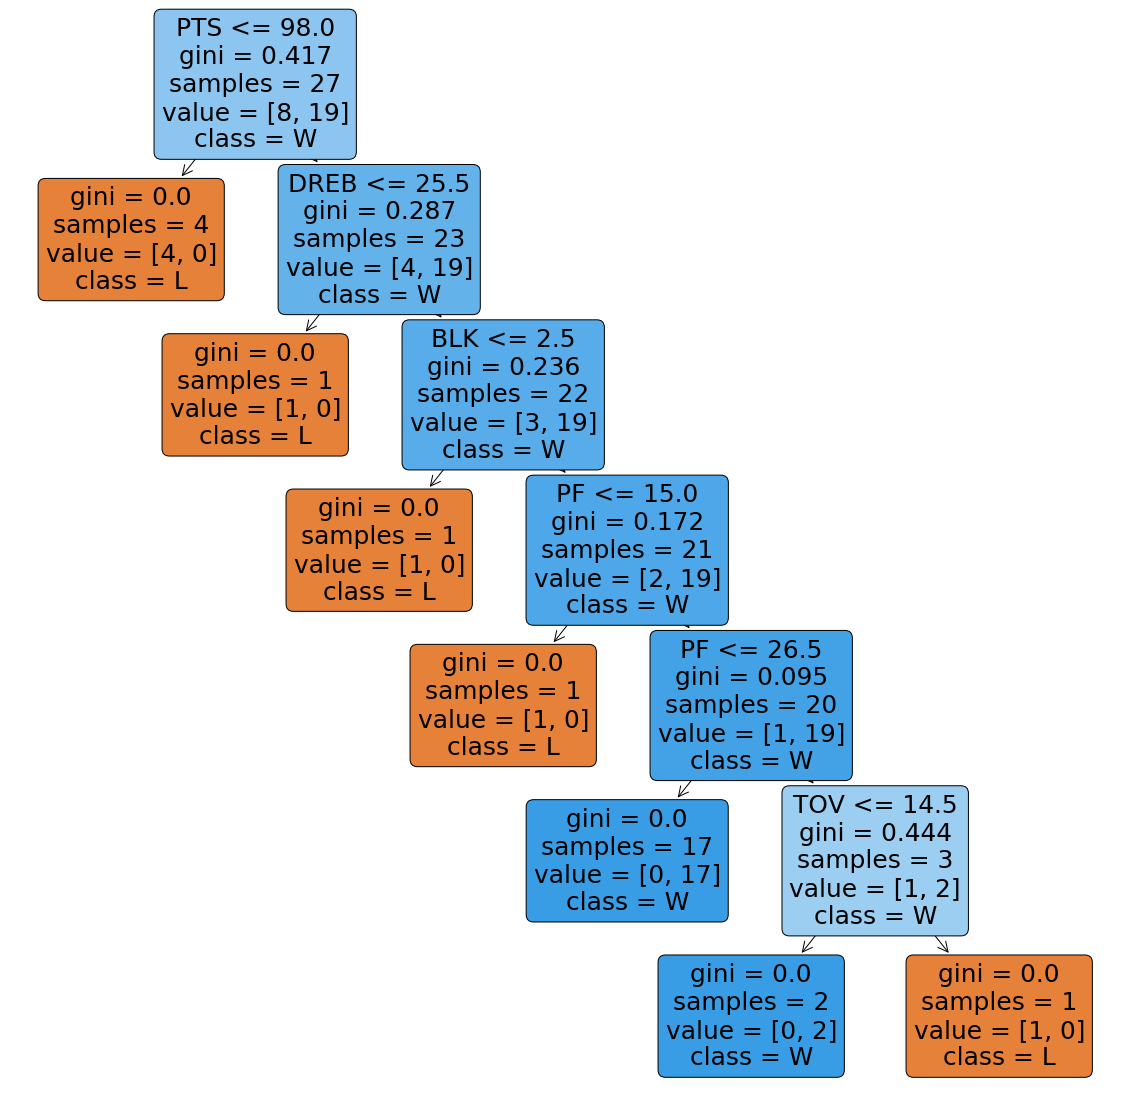

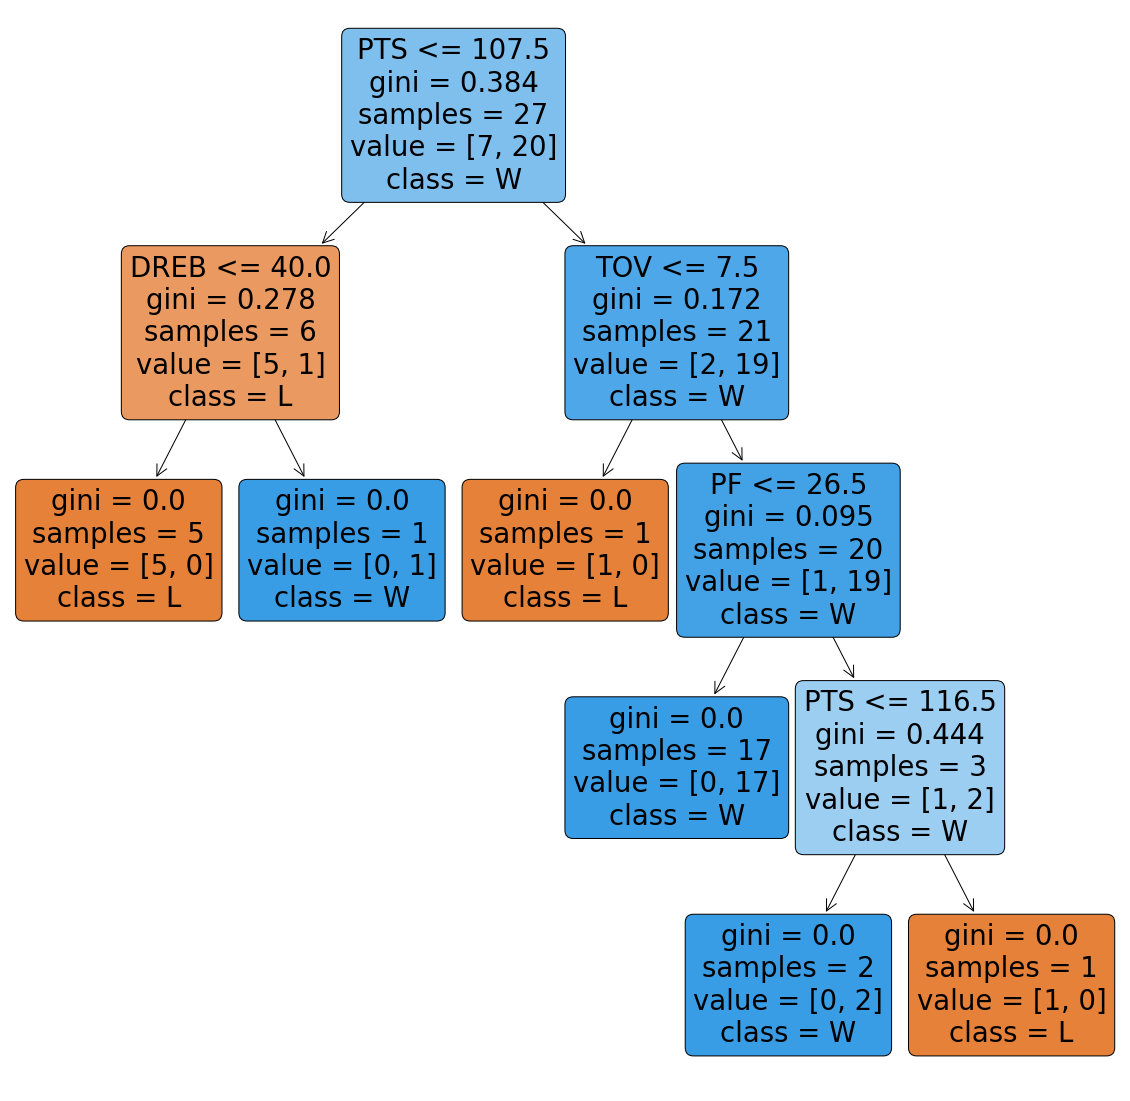

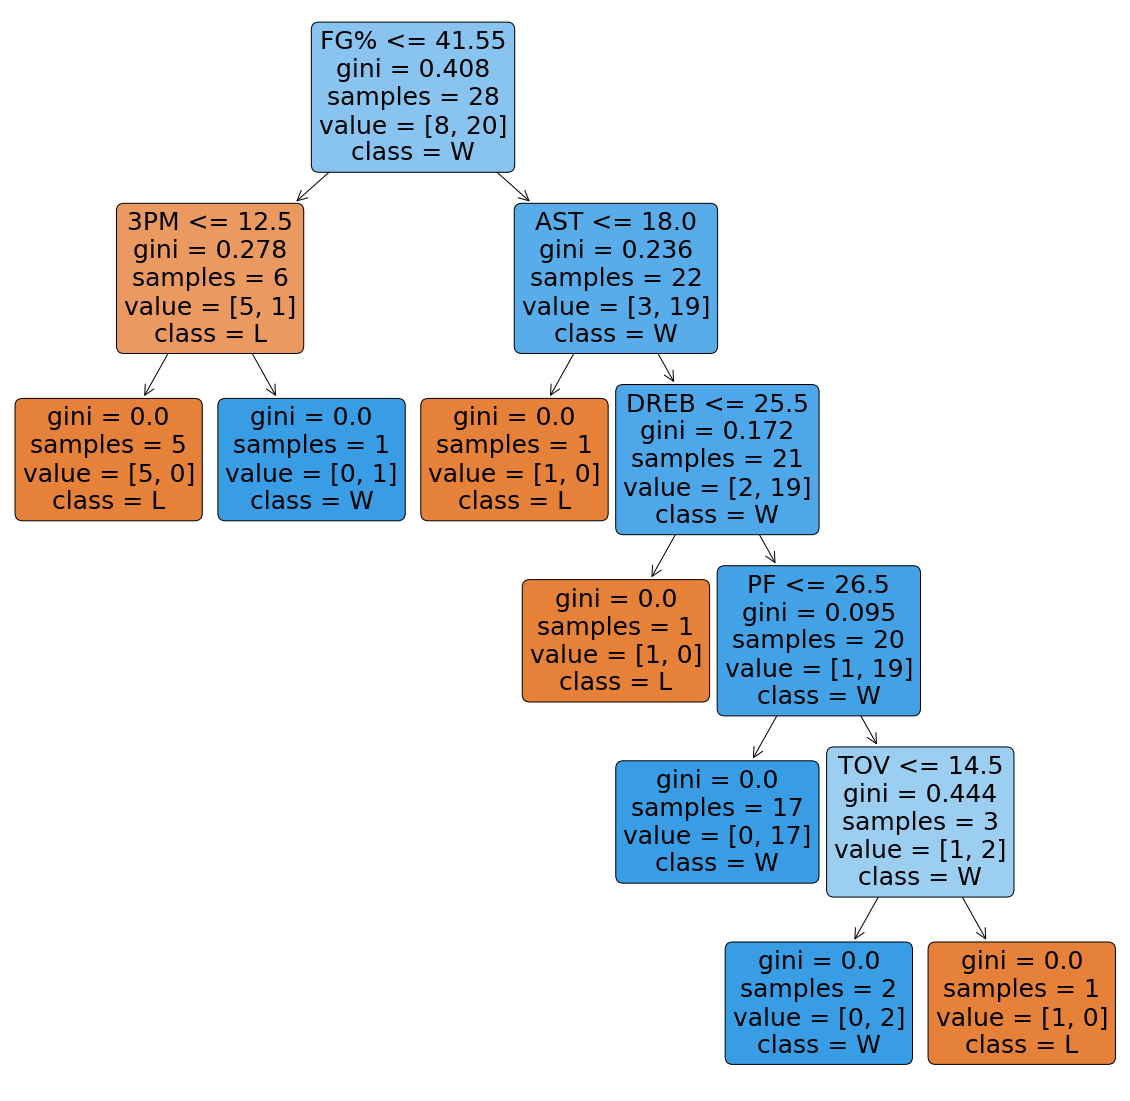

In [53]:
#x = tree.plot_tree(clf,feature_names=features,class_names=labels.astype(str),rounded=True,filled=True) 
#now you have to fit k models using the various splits
#after showing that there is isn't much sampling skew you can cross validate this way and choose a tree closest to the 
#mean value above
#note the splitting of folds occurs by randomly choosing 
from sklearn.model_selection import KFold
kf = KFold(n_splits = k, shuffle = True, random_state = 0)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    #scores = np.append(scores,model.score(x_test,y_test))
    #scores.append(model.score(x_test,y_test))
    print("model score = ",model.score(x_test,y_test))
    #print('Scores from each Iteration: ', scores)
    print('Average K-Fold Score :' , np.mean(scores)) 
    plt.figure()
    x = tree.plot_tree(model,rounded=True,filled=True,class_names=sorted,feature_names=features) 



In [54]:
#above43 = spark.sql("select * from stats where 3PA >43")
above43 = spark.sql("select * from stats where blk<=3")

above43.cache()
above43.createOrReplaceTempView("above43")
above43.show(100)

+----+---------+----------+---+---+---+---+---+----+---+---+----+---+---+----+----+----+---+---+---+---+---+---+---+
|TEAM| MATCH UP| GAME DATE|W/L|MIN|PTS|FGM|FGA| FG%|3PM|3PA| 3P%|FTM|FTA| FT%|OREB|DREB|REB|AST|STL|BLK|TOV| PF|+/-|
+----+---------+----------+---+---+---+---+---+----+---+---+----+---+---+----+----+----+---+---+---+---+---+---+---+
| BOS|BOS @ TOR|12/25/2019|  W|240|118| 46| 92|50.0| 14| 33|42.4| 12| 14|85.7|  13|  32| 45| 26|  7|  3| 19| 22| 16|
| BOS|BOS @ LAC|11/20/2019|  L|265|104| 41|104|39.4| 12| 45|26.7| 10| 14|71.4|  18|  35| 53| 26| 11|  2| 18| 22| -3|
| BOS|BOS @ SAC|11/17/2019|  L|240| 99| 34| 82|41.5| 10| 30|33.3| 21| 24|87.5|  10|  36| 46| 26|  7|  3| 15| 14| -1|
| BOS|BOS @ PHI|10/23/2019|  L|240| 93| 33| 90|36.7|  7| 26|26.9| 20| 34|58.8|  10|  31| 41| 18|  4|  2| 11| 29|-14|
+----+---------+----------+---+---+---+---+---+----+---+---+----+---+---+----+----+----+---+---+---+---+---+---+---+



In [26]:
#get test data now
#read in data from csv
test = spark.read.load("../src/test/resources/CelticsTest.csv",
                     format="csv", sep=",", inferSchema="true", header="true")
test.show()

+----+-----------+----------+---+---+---+---+---+----+---+---+----+---+---+----+----+----+---+---+---+---+---+---+---+
|TEAM|   MATCH UP| GAME DATE|W/L|MIN|PTS|FGM|FGA| FG%|3PM|3PA| 3P%|FTM|FTA| FT%|OREB|DREB|REB|AST|STL|BLK|TOV| PF|+/-|
+----+-----------+----------+---+---+---+---+---+----+---+---+----+---+---+----+----+----+---+---+---+---+---+---+---+
| BOS|  BOS @ WAS|  1/6/2020|  L|240| 94| 33| 95|34.7|  8| 37|21.6| 20| 26|76.9|  16|  39| 55| 17|  7|  8| 17| 20| -5|
| BOS|  BOS @ CHI|  1/4/2020|  W|240|111| 43| 82|52.4|  8| 19|42.1| 17| 21|81.0|  13|  31| 44| 22| 10|  5| 20| 22|  7|
| BOS|BOS vs. ATL|  1/3/2020|  W|240|109| 41| 93|44.1|  6| 25|24.0| 21| 29|72.4|  12|  42| 54| 23|  9|  7| 13| 16|  3|
| BOS|  BOS @ CHA|12/31/2019|  W|240|109| 44| 97|45.4| 14| 38|36.8|  7| 10|70.0|  15|  39| 54| 25| 12|  9| 13| 16| 17|
| BOS|BOS vs. TOR|12/28/2019|  L|240| 97| 31| 78|39.7|  7| 32|21.9| 28| 36|77.8|   7|  24| 31| 18| 11|  4| 15| 17|-16|
| BOS|BOS vs. CLE|12/27/2019|  W|240|129| 49| 95

In [27]:
testData=test.toPandas()
testData

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,BOS,BOS @ WAS,1/6/2020,L,240,94,33,95,34.7,8,...,76.9,16,39,55,17,7,8,17,20,-5
1,BOS,BOS @ CHI,1/4/2020,W,240,111,43,82,52.4,8,...,81.0,13,31,44,22,10,5,20,22,7
2,BOS,BOS vs. ATL,1/3/2020,W,240,109,41,93,44.1,6,...,72.4,12,42,54,23,9,7,13,16,3
3,BOS,BOS @ CHA,12/31/2019,W,240,109,44,97,45.4,14,...,70.0,15,39,54,25,12,9,13,16,17
4,BOS,BOS vs. TOR,12/28/2019,L,240,97,31,78,39.7,7,...,77.8,7,24,31,18,11,4,15,17,-16
5,BOS,BOS vs. CLE,12/27/2019,W,240,129,49,95,51.6,14,...,89.5,12,31,43,28,4,10,11,23,12
6,BOS,BOS @ TOR,12/25/2019,W,240,118,46,92,50.0,14,...,85.7,13,32,45,26,7,3,19,22,16
7,BOS,BOS vs. CHA,12/22/2019,W,240,119,46,88,52.3,14,...,81.3,10,47,57,25,2,9,13,24,26
8,BOS,BOS vs. DET,12/20/2019,W,240,114,45,86,52.3,9,...,71.4,13,38,51,24,13,9,20,19,21


In [28]:
#get X features
XTest = testData.loc[:,features]
XTest

,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,94,33,95,34.7,8,37,21.6,20,26,76.9,16,39,55,17,7,8,17,20
1,111,43,82,52.4,8,19,42.1,17,21,81.0,13,31,44,22,10,5,20,22
2,109,41,93,44.1,6,25,24.0,21,29,72.4,12,42,54,23,9,7,13,16
3,109,44,97,45.4,14,38,36.8,7,10,70.0,15,39,54,25,12,9,13,16
4,97,31,78,39.7,7,32,21.9,28,36,77.8,7,24,31,18,11,4,15,17
5,129,49,95,51.6,14,40,35.0,17,19,89.5,12,31,43,28,4,10,11,23
6,118,46,92,50.0,14,33,42.4,12,14,85.7,13,32,45,26,7,3,19,22
7,119,46,88,52.3,14,32,43.8,13,16,81.3,10,47,57,25,2,9,13,24
8,114,45,86,52.3,9,27,33.3,15,21,71.4,13,38,51,24,13,9,20,19


In [29]:
YTest = testData["W/L"]
YTest

0    L
1    W
2    W
3    W
4    L
5    W
6    W
7    W
8    W
Name: W/L, dtype: object

In [30]:
#make predictions on test data 
YPredicted = clf.predict(XTest)
YPredicted

array(['L', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'L'], dtype=object)

In [31]:
YTest

0    L
1    W
2    W
3    W
4    L
5    W
6    W
7    W
8    W
Name: W/L, dtype: object

In [32]:
#calculate accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(YTest,YPredicted)
accuracy

0.5555555555555556

[30.0, 5.0]
[[1 1]
 [3 4]]


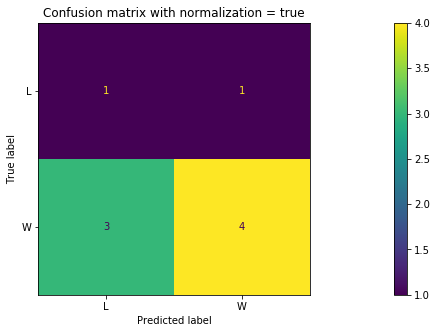

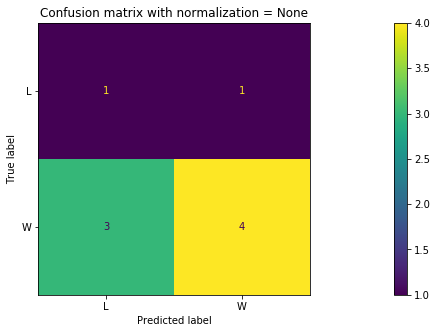

In [33]:
#setup plots for confusion matrix
from sklearn.metrics import plot_confusion_matrix as matrix
figSize = plt.rcParams["figure.figsize"]
figSize[0] = 30
figSize[1] = 5
plt.rcParams["figure.figsize"]=figSize
print(plt.rcParams.get('figure.figsize'))

#plot the confusion matrices 1 for normalzied the other un-normalized
values = ['true',None]
#cmap='cividis'
for x in values:
    disp = matrix(clf,XTest,YTest,display_labels=sorted)
    disp.ax_.set_title("Confusion matrix with normalization = "+str(x))
print(disp.confusion_matrix)

In [34]:
#get false positives
pd.set_option('display.max_rows',100)
testData[(YTest!=YPredicted)&(YPredicted=="W")]

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
4,BOS,BOS vs. TOR,12/28/2019,L,240,97,31,78,39.7,7,...,77.8,7,24,31,18,11,4,15,17,-16


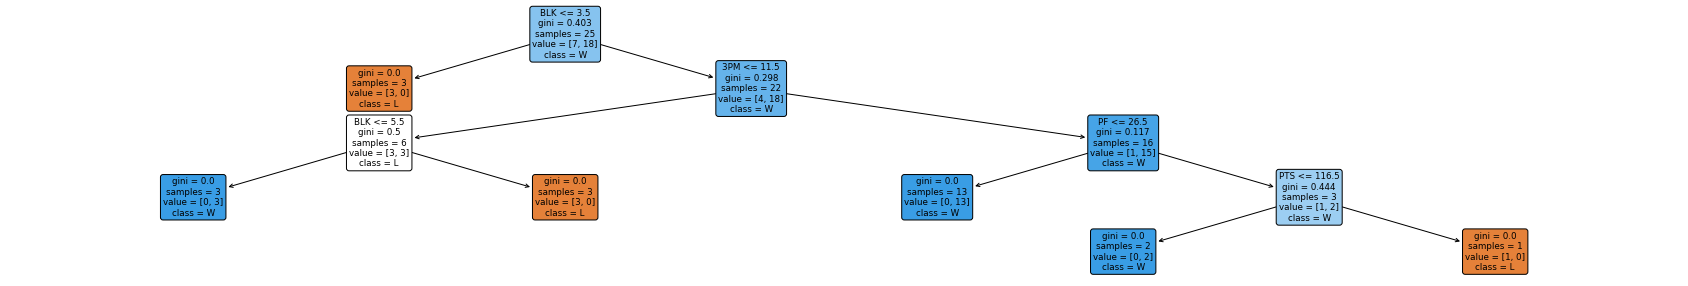

In [35]:
x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features) 


In [36]:
#get false negative
pd.set_option('display.max_rows',100)
testData[(YTest!=YPredicted)&(YPredicted=="L")]

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
2,BOS,BOS vs. ATL,1/3/2020,W,240,109,41,93,44.1,6,...,72.4,12,42,54,23,9,7,13,16,3
6,BOS,BOS @ TOR,12/25/2019,W,240,118,46,92,50.0,14,...,85.7,13,32,45,26,7,3,19,22,16
8,BOS,BOS vs. DET,12/20/2019,W,240,114,45,86,52.3,9,...,71.4,13,38,51,24,13,9,20,19,21


In [37]:
spark.stop()